# Introducción a la Ciencia de Datos con Python - Reporte Final

## Título
Tiempo de atención en sucursales de entidad bancaria local

## Integrantes
- Damián Augusto Meza Candia
- Javier Augusto Meza Candia

## Contenido
- [Introducción](#Introducción)
- [Descripción del dataset](#Descripción-del-dataset)
- [Tipo de problema planteado](#Tipo-de-problema-planteado)
- [Metodología empleada para resolver el problema](#Metodología-empleada-para-resolver-el-problema)
    - [Limpieza de datos](#Limpieza-de-datos)
    - [Análisis de datos](#Análisis-de-datos)
- [Métricas de desempeño utilizadas](#Métricas-de-desempeño-utilizadas)
- [Descripción de los resultados obtenidos](#Descripción-de-los-resultados-obtenidos)
- [Referencias](#Referencias)

## Introducción
El problema que queremos resolver se trata de predecir el tiempo de espera y atención de los clientes en las diferentes sucursales de una entidad bancaria local, según el tipo de operación/servicio que desean realizar, de manera a optimizar los recursos y lograr una atención más eficaz dentro de las mismas.

Preguntas claves:
- ¿El tiempo de espera está directamente relacionado con el tipo de operación a realizar?
- ¿El tiempo de espera está relacionado con la variable del día de la semana? ¿O el horario del día?
- ¿El tiempo de espera está relacionado con la sucursal de atención?
- ¿El tiempo de espera está relacionado con la categoría de cliente?

## Descripción del dataset
El dataset contiene datos de tickets de atención a clientes presenciales en sucursales de una entidad bancaria local durante el mes de Octubre de 2022.
Sobre cada atención en particular se cuenta con los siguientes datos: sucursal, zona de la sucursal, sector dentro de la sucursal, box de atención, tipo de atención, estado de atención, categoría del cliente, identificación del cliente, usuario encargado de la atención, tiempo de espera, tiempo de atención, motivo de cierre del ticket, entre otros.

- **Variables:** Código de sucursal, tipo de cola, nro. de atención general, fecha de ingreso a la sucursal, fecha y hora de inicio del llamado, fecha y hora de inicio de atención, fecha y hora de fin de atención, código de caja de atención, nro. de ticket, categoría de cliente, tiempo de espera, tiempo atendido, entre otros.
- **Tipos de datos:** Contamos con datos categóricos, datos de fechas y datos numéricos.
- **Número de registros:** 69.481 registros
- **Datos faltantes:** contamos con datos faltantes en la columna de fecha y hora de inicio de atención o fin de atención, en cuyo caso optamos por ignorar los registros (2.450 registros). También descartamos las columnas sin dato alguno en ninguna fila.

## Tipo de problema planteado
Identificamos que el problema corresponde a un problema de regresión.

## Metodología empleada para resolver el problema
Llevaremos a cabo mediante el lenguaje de programación Python y las librerías disponibles, los pasos necesarios para extraer la información de los sistemas transaccionales, comprender la situación actual y descubrir patrones que ayuden a la toma de decisiones para mejorar la calidad de la atención a los clientes.

### Limpieza de datos

In [1]:
import numpy as np
import pandas as pd

# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('dataset_ticket_hist.csv', index_col=0, low_memory=False)

In [2]:
# display the first 5 rows
data.head()

,SUCCOD,TIPCOLACOD,NRO_DE_ATENCION_GENERAL,COLFECING,COLHORING,USRCOD,COLABN,COLHORAINIAT,COLHORAFINAT,BOXCOD,...,tiempo2daLinea,yallamo,derivado_a,ticket_inicial,enviado_a_standby,COLHORAINITSTANBY,MHORAENV,MHORACONF,EST_PORT,SERV_INICIAL
,,,,,,,,,,,,,,,,,,,,,
1,CEN,CEN0127,30434786,4/10/2022 08:25:46,4/10/2022 08:25:46,recepcen,NaN,4/10/2022 09:01:14,4/10/2022 09:01:20,AT2,...,NaN,S,NaN,NaN,N,NaN,NaN,NaN,NaN,CEN0128
2,CEN,CEN0100,30434787,4/10/2022 09:01:13,4/10/2022 09:01:13,recepcen,NaN,4/10/2022 09:01:14,4/10/2022 09:02:29,CA1,...,NaN,S,NaN,NaN,N,NaN,NaN,NaN,NaN,CEN0110
3,CEN,CEN0100,30434788,4/10/2022 09:01:36,4/10/2022 09:01:36,recepcen,NaN,4/10/2022 09:03:09,4/10/2022 09:06:52,CA3,...,NaN,S,NaN,NaN,N,NaN,NaN,NaN,NaN,CEN0110
4,CEN,CEN0104,30434789,4/10/2022 09:01:49,4/10/2022 09:01:49,recepcen,NaN,4/10/2022 09:02:40,4/10/2022 09:09:23,CA1,...,NaN,S,NaN,NaN,N,NaN,NaN,NaN,NaN,CEN0110
5,CEN,CEN0100,30434790,4/10/2022 09:05:03,4/10/2022 09:05:03,recepcen,NaN,4/10/2022 09:06:54,4/10/2022 09:08:48,CA3,...,NaN,S,NaN,NaN,N,NaN,NaN,NaN,NaN,CEN0110


In [3]:
# display the last 5 rows
data.tail()

,SUCCOD,TIPCOLACOD,NRO_DE_ATENCION_GENERAL,COLFECING,COLHORING,USRCOD,COLABN,COLHORAINIAT,COLHORAFINAT,BOXCOD,...,tiempo2daLinea,yallamo,derivado_a,ticket_inicial,enviado_a_standby,COLHORAINITSTANBY,MHORAENV,MHORACONF,EST_PORT,SERV_INICIAL
,,,,,,,,,,,,,,,,,,,,,
69477,SRA,SRA0143,290005401,31/10/2022 12:31:52,31/10/2022 12:31:52,lschupp,NaN,31/10/2022 12:31:52,31/10/2022 12:33:25,AT1,...,NaN,N,NaN,NaN,N,NaN,NaN,NaN,NaN,SRA0147
69478,SRA,SRA0102,290005402,31/10/2022 12:41:55,31/10/2022 12:41:55,rrojash,NaN,31/10/2022 12:41:55,31/10/2022 13:11:42,CJ1,...,NaN,N,NaN,NaN,N,NaN,NaN,NaN,NaN,SRA0110
69479,SRA,SRA0105,290005403,31/10/2022 13:11:53,31/10/2022 13:11:53,rrojash,NaN,31/10/2022 13:11:53,31/10/2022 13:13:10,CJ1,...,NaN,N,NaN,NaN,N,NaN,NaN,NaN,NaN,SRA0110
69480,SRA,SRA0109,290005404,31/10/2022 13:13:28,31/10/2022 13:13:28,rrojash,NaN,31/10/2022 13:13:28,31/10/2022 13:17:32,CJ1,...,NaN,N,NaN,NaN,N,NaN,NaN,NaN,NaN,SRA0110
69481,SRA,SRA0106,290005405,31/10/2022 13:28:44,31/10/2022 13:28:44,rrojash,NaN,31/10/2022 13:28:44,31/10/2022 13:31:04,CJ1,...,NaN,N,NaN,NaN,N,NaN,NaN,NaN,NaN,SRA0110


In [4]:
# check the shape of the DataFrame (rows, columns)
data.shape

(69481, 35)

In [5]:
# eliminamos las columnas que no se necesitan
data.drop('COLHORING', inplace=True, axis=1)
data.drop('COLABN', inplace=True, axis=1)
data.drop('DESPLAN_CONSU', inplace=True, axis=1)
data.drop('MODOPAGO', inplace=True, axis=1)
data.drop('TIPCUENTA', inplace=True, axis=1)
data.drop('ESTCUENTA', inplace=True, axis=1)
data.drop('DESMARMOD', inplace=True, axis=1)
data.drop('SITUEQUIP', inplace=True, axis=1)
data.drop('MOTREGIS', inplace=True, axis=1)
data.drop('MHORAENV', inplace=True, axis=1)
data.drop('MHORACONF', inplace=True, axis=1)
data.drop('EST_PORT', inplace=True, axis=1)

# eliminamos otras columnas que no se necesitan
data.drop('NRO_DE_ATENCION_GENERAL', inplace=True, axis=1)
data.drop('USRCOD', inplace=True, axis=1)
data.drop('BOXCOD', inplace=True, axis=1)
data.drop('COLNROTICK', inplace=True, axis=1)
data.drop('TICKEST', inplace=True, axis=1)
data.drop('USRATENDIO', inplace=True, axis=1)
data.drop('CONTATEN', inplace=True, axis=1)
data.drop('tiempo2daLinea', inplace=True, axis=1)
data.drop('yallamo', inplace=True, axis=1)
data.drop('derivado_a', inplace=True, axis=1)
data.drop('ticket_inicial', inplace=True, axis=1)
data.drop('enviado_a_standby', inplace=True, axis=1)
data.drop('COLHORAINITSTANBY', inplace=True, axis=1)
data.drop('SERV_INICIAL', inplace=True, axis=1)

In [6]:
# eliminamos las filas con datos faltantes
data = data.dropna(subset=['COLHORAINIAT'])
data = data.dropna(subset=['COLHORAFINAT'])

In [7]:
# check the shape of the DataFrame (rows, columns)
data.shape

(67031, 9)

La función *apply()* en DataFrame tomará alguna función arbitraria que haya escrito y la aplicará a una *serie* (una sola columna) o DataFrame en todas las filas o columnas.

In [8]:
def todatetime(row):
    #La fila es un único objeto de *Series* que es una sola fila indexada por valores de columna.
    #Convertimos el tipo de dato en una nueva entrada en la serie.
    row['FEC_INGRESO']=pd.to_datetime(row['COLFECING'], format="%d/%m/%Y %H:%M:%S")
    row['FEC_INI_ATENCION']=pd.to_datetime(row['COLHORAINIAT'], format="%d/%m/%Y %H:%M:%S")
    row['FEC_FIN_ATENCION']=pd.to_datetime(row['COLHORAFINAT'], format="%d/%m/%Y %H:%M:%S")
    row['FEC_INI_LLAMADA']=pd.to_datetime(row['COLHORAINILLA'], format="%d/%m/%Y %H:%M:%S")
    #Ahora solo retornamos la fila y la función apply() se encargará de fusionarlas de vuelta en un DataFrame
    return row

In [9]:
data=data.apply(todatetime, axis="columns")
data.head()

,SUCCOD,TIPCOLACOD,COLFECING,COLHORAINIAT,COLHORAFINAT,COLHORAINILLA,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA
,,,,,,,,,,,,,
1,CEN,CEN0127,4/10/2022 08:25:46,4/10/2022 09:01:14,4/10/2022 09:01:20,4/10/2022 09:01:12,LL,36,0.0,2022-10-04 08:25:46,2022-10-04 09:01:14,2022-10-04 09:01:20,2022-10-04 09:01:12
2,CEN,CEN0100,4/10/2022 09:01:13,4/10/2022 09:01:14,4/10/2022 09:02:29,4/10/2022 09:01:13,N,0,1.0,2022-10-04 09:01:13,2022-10-04 09:01:14,2022-10-04 09:02:29,2022-10-04 09:01:13
3,CEN,CEN0100,4/10/2022 09:01:36,4/10/2022 09:03:09,4/10/2022 09:06:52,4/10/2022 09:03:08,N,2,3.0,2022-10-04 09:01:36,2022-10-04 09:03:09,2022-10-04 09:06:52,2022-10-04 09:03:08
4,CEN,CEN0104,4/10/2022 09:01:49,4/10/2022 09:02:40,4/10/2022 09:09:23,4/10/2022 09:02:30,RR,1,7.0,2022-10-04 09:01:49,2022-10-04 09:02:40,2022-10-04 09:09:23,2022-10-04 09:02:30
5,CEN,CEN0100,4/10/2022 09:05:03,4/10/2022 09:06:54,4/10/2022 09:08:48,4/10/2022 09:06:53,N,1,2.0,2022-10-04 09:05:03,2022-10-04 09:06:54,2022-10-04 09:08:48,2022-10-04 09:06:53


In [10]:
# eliminamos las viejas columnas que YA no se necesitan
data.drop('COLFECING', inplace=True, axis=1)
data.drop('COLHORAINIAT', inplace=True, axis=1)
data.drop('COLHORAFINAT', inplace=True, axis=1)
data.drop('COLHORAINILLA', inplace=True, axis=1)
data.head()

,SUCCOD,TIPCOLACOD,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA
,,,,,,,,,
1,CEN,CEN0127,LL,36,0.0,2022-10-04 08:25:46,2022-10-04 09:01:14,2022-10-04 09:01:20,2022-10-04 09:01:12
2,CEN,CEN0100,N,0,1.0,2022-10-04 09:01:13,2022-10-04 09:01:14,2022-10-04 09:02:29,2022-10-04 09:01:13
3,CEN,CEN0100,N,2,3.0,2022-10-04 09:01:36,2022-10-04 09:03:09,2022-10-04 09:06:52,2022-10-04 09:03:08
4,CEN,CEN0104,RR,1,7.0,2022-10-04 09:01:49,2022-10-04 09:02:40,2022-10-04 09:09:23,2022-10-04 09:02:30
5,CEN,CEN0100,N,1,2.0,2022-10-04 09:05:03,2022-10-04 09:06:54,2022-10-04 09:08:48,2022-10-04 09:06:53


In [11]:
data['TIEMPO_ESPERA'] = round((data.FEC_INI_ATENCION-data.FEC_INGRESO) / pd.Timedelta(minutes=1), 2)
data['TIEMPO_TOTAL_ATENCION'] = round((data.FEC_FIN_ATENCION-data.FEC_INI_ATENCION) / pd.Timedelta(minutes=1), 2)
data['TIPO_OPERACION'] = data.TIPCOLACOD.str.slice(3)
data.head()

,SUCCOD,TIPCOLACOD,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA,TIEMPO_ESPERA,TIEMPO_TOTAL_ATENCION,TIPO_OPERACION
,,,,,,,,,,,,
1,CEN,CEN0127,LL,36,0.0,2022-10-04 08:25:46,2022-10-04 09:01:14,2022-10-04 09:01:20,2022-10-04 09:01:12,35.47,0.10,0127
2,CEN,CEN0100,N,0,1.0,2022-10-04 09:01:13,2022-10-04 09:01:14,2022-10-04 09:02:29,2022-10-04 09:01:13,0.02,1.25,0100
3,CEN,CEN0100,N,2,3.0,2022-10-04 09:01:36,2022-10-04 09:03:09,2022-10-04 09:06:52,2022-10-04 09:03:08,1.55,3.72,0100
4,CEN,CEN0104,RR,1,7.0,2022-10-04 09:01:49,2022-10-04 09:02:40,2022-10-04 09:09:23,2022-10-04 09:02:30,0.85,6.72,0104
5,CEN,CEN0100,N,1,2.0,2022-10-04 09:05:03,2022-10-04 09:06:54,2022-10-04 09:08:48,2022-10-04 09:06:53,1.85,1.90,0100


In [12]:
def toweekday(row):
    #La fila es un único objeto de *Series* que es una sola fila indexada por valores de columna.
    #Convertimos el tipo de dato en una nueva entrada en la serie.
    row['DIA_MES']=row['FEC_INGRESO'].day
    row['DIA_SEMANA']=row['FEC_INGRESO'].isoweekday()
    row['HORA_DIA']=row['FEC_INGRESO'].hour
    #Ahora solo retornamos la fila y la función apply() se encargará de fusionarlas de vuelta en un DataFrame
    return row

In [13]:
#Categorizamos por dia de la semana
data=data.apply(toweekday, axis="columns")
data.head()

,SUCCOD,TIPCOLACOD,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA,TIEMPO_ESPERA,TIEMPO_TOTAL_ATENCION,TIPO_OPERACION,DIA_MES,DIA_SEMANA,HORA_DIA
,,,,,,,,,,,,,,,
1,CEN,CEN0127,LL,36,0.0,2022-10-04 08:25:46,2022-10-04 09:01:14,2022-10-04 09:01:20,2022-10-04 09:01:12,35.47,0.10,0127,4,2,8
2,CEN,CEN0100,N,0,1.0,2022-10-04 09:01:13,2022-10-04 09:01:14,2022-10-04 09:02:29,2022-10-04 09:01:13,0.02,1.25,0100,4,2,9
3,CEN,CEN0100,N,2,3.0,2022-10-04 09:01:36,2022-10-04 09:03:09,2022-10-04 09:06:52,2022-10-04 09:03:08,1.55,3.72,0100,4,2,9
4,CEN,CEN0104,RR,1,7.0,2022-10-04 09:01:49,2022-10-04 09:02:40,2022-10-04 09:09:23,2022-10-04 09:02:30,0.85,6.72,0104,4,2,9
5,CEN,CEN0100,N,1,2.0,2022-10-04 09:05:03,2022-10-04 09:06:54,2022-10-04 09:08:48,2022-10-04 09:06:53,1.85,1.90,0100,4,2,9


In [14]:
data.tail()

,SUCCOD,TIPCOLACOD,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA,TIEMPO_ESPERA,TIEMPO_TOTAL_ATENCION,TIPO_OPERACION,DIA_MES,DIA_SEMANA,HORA_DIA
,,,,,,,,,,,,,,,
69477,SRA,SRA0143,NN,0,2.0,2022-10-31 12:31:52,2022-10-31 12:31:52,2022-10-31 12:33:25,2022-10-31 12:31:52,0.0,1.55,0143,31,1,12
69478,SRA,SRA0102,AA,0,30.0,2022-10-31 12:41:55,2022-10-31 12:41:55,2022-10-31 13:11:42,2022-10-31 12:41:55,0.0,29.78,0102,31,1,12
69479,SRA,SRA0105,MM,0,2.0,2022-10-31 13:11:53,2022-10-31 13:11:53,2022-10-31 13:13:10,2022-10-31 13:11:53,0.0,1.28,0105,31,1,13
69480,SRA,SRA0109,LL,0,4.0,2022-10-31 13:13:28,2022-10-31 13:13:28,2022-10-31 13:17:32,2022-10-31 13:13:28,0.0,4.07,0109,31,1,13
69481,SRA,SRA0106,NN,0,3.0,2022-10-31 13:28:44,2022-10-31 13:28:44,2022-10-31 13:31:04,2022-10-31 13:28:44,0.0,2.33,0106,31,1,13


In [15]:
data.shape

(67031, 15)

### Análisis de datos

Analizamos las funciones de agregación del tiempo de espera (en minutos):

In [16]:
# Por día de la semana
# 1=Lunes, 2=Martes, 3=Miércoles, 4=Jueves, 5=Viernes
data.groupby("DIA_SEMANA").agg({"TIEMPO_ESPERA":(np.min,np.max,np.average,np.median,np.mean,np.std)})

TIEMPO_ESPERA                                              
                    amin    amax   average median      mean        std
DIA_SEMANA                                                            
1                    0.0  215.18  6.441777   1.97  6.441777  10.119270
2                    0.0  378.68  7.502559   1.92  7.502559  13.534284
3                    0.0  297.23  5.602301   1.40  5.602301  12.546038
4                    0.0  284.17  4.369658   0.98  4.369658   8.161837
5                    0.0  280.95  7.294308   2.58  7.294308  10.876908

In [17]:
# Por hora del día
data.groupby("HORA_DIA").agg({"TIEMPO_ESPERA":(np.min,np.max,np.average,np.median,np.mean,np.std)})

TIEMPO_ESPERA                                              
                  amin    amax   average median      mean        std
HORA_DIA                                                            
8                  0.0  301.15  4.761163  0.825  4.761163  10.863514
9                  0.0  378.68  5.798338  1.420  5.798338  12.446987
10                 0.0  297.23  7.064838  1.970  7.064838  12.883892
11                 0.0  171.22  6.917770  1.920  6.917770  11.170248
12                 0.0  289.35  6.322331  1.700  6.322331  10.867984
13                 0.0  191.68  5.914363  1.820  5.914363   9.178912
14                 0.0   67.32  6.814840  2.820  6.814840   8.717565
15                 0.0   98.97  4.034110  0.670  4.034110   9.058180
16                 0.0   77.85  3.239310  0.250  3.239310  14.379887
17                 0.0    2.72  0.027238  0.000  0.027238   0.211940
18                 0.0    0.23  0.032857  0.000  0.032857   0.086932

#### Recorte
El recorte implica la limitación de todos los valores por debajo o por encima de un determinado valor. El recorte es útil cuando una columna contiene algunos valores atípicos. Podemos establecer un valor máximo vmax y un valor mínimo vmin y establecer todos los valores atípicos mayores que el valor máximo en vmax y todos los valores atípicos menores que el valor mínimo en vmin.
Establecemos los valores mínimo y máximo para el tiempo de espera y el tiempo total de atención (en minutos):
- vmin = 0
- vmax = 90

In [18]:
vmin = 0
vmax = 90

data['TIEMPO_ESPERA_CLIP'] = data['TIEMPO_ESPERA'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)
data['TIEMPO_TOTAL_ATENCION_CLIP'] = data['TIEMPO_TOTAL_ATENCION'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)
data.head()

,SUCCOD,TIPCOLACOD,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA,TIEMPO_ESPERA,TIEMPO_TOTAL_ATENCION,TIPO_OPERACION,DIA_MES,DIA_SEMANA,HORA_DIA,TIEMPO_ESPERA_CLIP,TIEMPO_TOTAL_ATENCION_CLIP
,,,,,,,,,,,,,,,,,
1,CEN,CEN0127,LL,36,0.0,2022-10-04 08:25:46,2022-10-04 09:01:14,2022-10-04 09:01:20,2022-10-04 09:01:12,35.47,0.10,0127,4,2,8,35.47,0.10
2,CEN,CEN0100,N,0,1.0,2022-10-04 09:01:13,2022-10-04 09:01:14,2022-10-04 09:02:29,2022-10-04 09:01:13,0.02,1.25,0100,4,2,9,0.02,1.25
3,CEN,CEN0100,N,2,3.0,2022-10-04 09:01:36,2022-10-04 09:03:09,2022-10-04 09:06:52,2022-10-04 09:03:08,1.55,3.72,0100,4,2,9,1.55,3.72
4,CEN,CEN0104,RR,1,7.0,2022-10-04 09:01:49,2022-10-04 09:02:40,2022-10-04 09:09:23,2022-10-04 09:02:30,0.85,6.72,0104,4,2,9,0.85,6.72
5,CEN,CEN0100,N,1,2.0,2022-10-04 09:05:03,2022-10-04 09:06:54,2022-10-04 09:08:48,2022-10-04 09:06:53,1.85,1.90,0100,4,2,9,1.85,1.90


Volvemos a analizar las funciones de agregación del tiempo de espera (en minutos):

In [19]:
# Por día de la semana
# 1=Lunes, 2=Martes, 3=Miércoles, 4=Jueves, 5=Viernes
data.groupby("DIA_SEMANA").agg({"TIEMPO_ESPERA_CLIP":(np.min,np.max,np.average,np.median,np.mean,np.std)})

TIEMPO_ESPERA_CLIP                                            
                         amin  amax   average median      mean        std
DIA_SEMANA                                                               
1                         0.0  90.0  6.410127   1.97  6.410127   9.715356
2                         0.0  90.0  7.393995   1.92  7.393995  12.286309
3                         0.0  90.0  5.434312   1.40  5.434312  10.410033
4                         0.0  90.0  4.336334   0.98  4.336334   7.498372
5                         0.0  90.0  7.237210   2.58  7.237210  10.083421

In [20]:
# Por hora del día
data.groupby("HORA_DIA").agg({"TIEMPO_ESPERA_CLIP":(np.min,np.max,np.average,np.median,np.mean,np.std)})

TIEMPO_ESPERA_CLIP                                             
                       amin   amax   average median      mean        std
HORA_DIA                                                                
8                       0.0  90.00  4.625943  0.825  4.625943   8.382798
9                       0.0  90.00  5.640759  1.420  5.640759  10.252484
10                      0.0  90.00  6.957144  1.970  6.957144  11.774716
11                      0.0  90.00  6.889137  1.920  6.889137  10.876925
12                      0.0  90.00  6.250709  1.700  6.250709   9.843447
13                      0.0  90.00  5.890493  1.820  5.890493   8.861392
14                      0.0  67.32  6.814840  2.820  6.814840   8.717565
15                      0.0  90.00  3.993151  0.670  3.993151   8.637443
16                      0.0  77.85  3.239310  0.250  3.239310  14.379887
17                      0.0   2.72  0.027238  0.000  0.027238   0.211940
18                      0.0   0.23  0.032857  0.000  0.032857   0.086932

#### Visualización

In [21]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

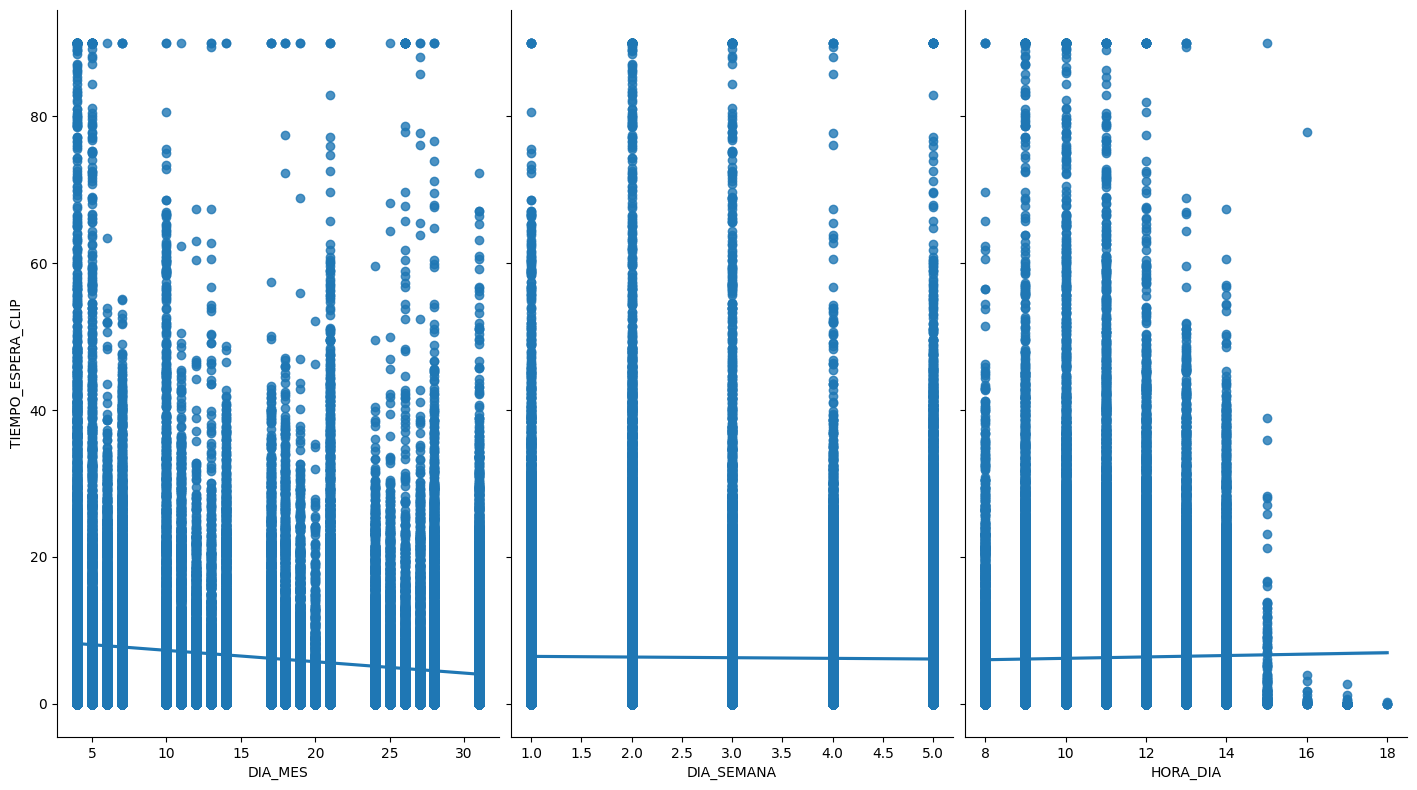

In [22]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['DIA_MES','DIA_SEMANA','HORA_DIA'], y_vars='TIEMPO_ESPERA_CLIP', height=8, aspect=0.6, kind='reg')

<AxesSubplot: xlabel='CATCLI', ylabel='TIEMPO_ESPERA_CLIP'>

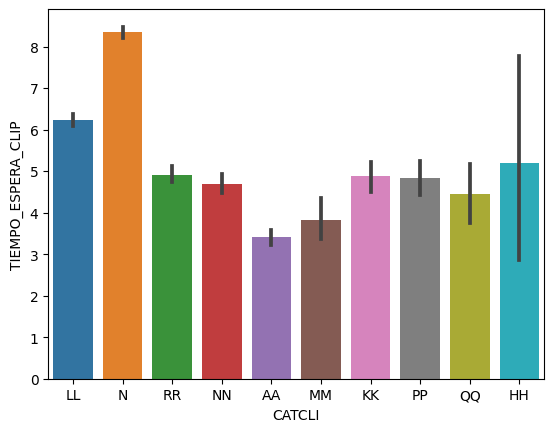

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns.barplot(data, x='CATCLI', y='TIEMPO_ESPERA_CLIP')

<AxesSubplot: xlabel='TIEMPO_ESPERA_CLIP', ylabel='SUCCOD'>

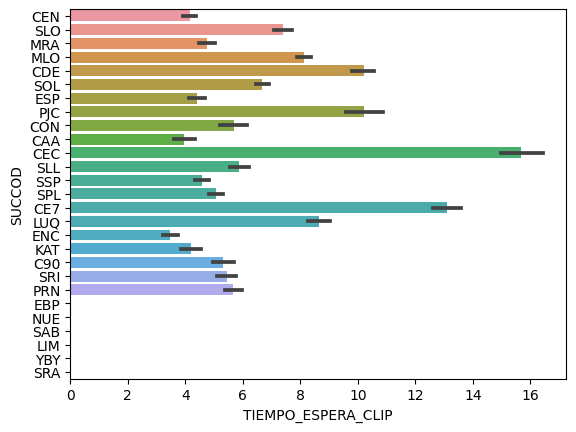

In [24]:
# visualize the relationship between the features and the response using scatterplots
sns.barplot(data, x='TIEMPO_ESPERA_CLIP', y='SUCCOD', orient='h')

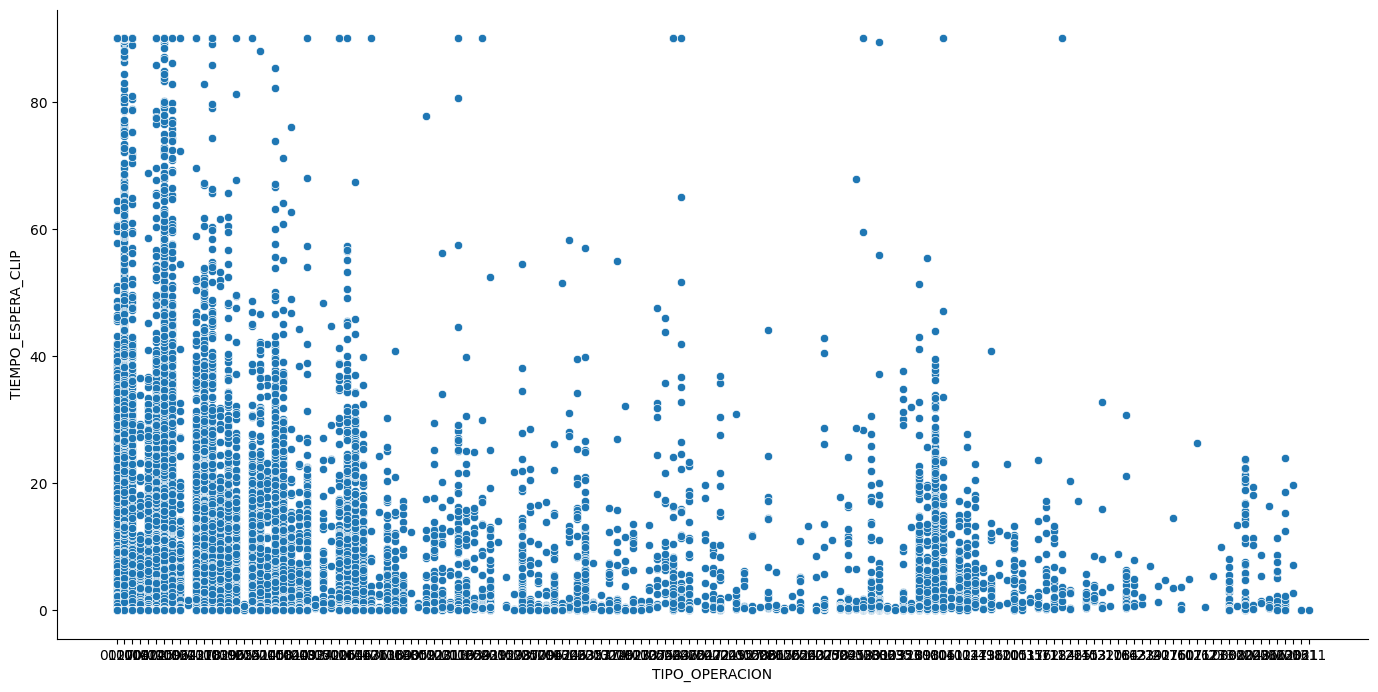

In [25]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TIPO_OPERACION'], y_vars='TIEMPO_ESPERA_CLIP', height=7, aspect=2, kind='scatter')

#### Codificación de datos categóricos
Muchos algoritmos de aprendizaje automático son incapaces de procesar variables categóricas. Por ejemplo: Bajo, Medio, Alto.

Por lo tanto, es importante codificar los datos en una forma adecuada para poder preprocesar estas variables. La codificación consiste en convertir todas las variables de entrada y salida en numéricas. De este modo, el modelo podrá comprender y extraer la información generando la salida deseada. Los datos categóricos varían en función del número de valores posibles.

In [26]:
# Find unique values of a column
print(data['TIPO_OPERACION'].unique())
print(data['CATCLI'].unique())

['0127' '0100' '0104' '0180' '0122' '0145' '0109' '0106' '0124' '0322'
 '0137' '0118' '0102' '0139' '0196' '0105' '0225' '0141' '0214' '0205'
 '0108' '0101' '0144' '0209' '0103' '0324' '0172' '0500' '0126' '0164'
 '0156' '0143' '0176' '0211' '0138' '0160' '0140' '0305' '0309' '0121'
 '0120' '0231' '0213' '0119' '0163' '0259' '0241' '0239' '0212' '0159'
 '0178' '0237' '0250' '0179' '0206' '0142' '0174' '0306' '0233' '0235'
 '0223' '0177' '0314' '0229' '0162' '0123' '0173' '0107' '0255' '0248'
 '0243' '0246' '0270' '0251' '0247' '0272' '0221' '0249' '0252' '0157'
 '0158' '0208' '0261' '0265' '0175' '0262' '0254' '0263' '0207' '0227'
 '0258' '0302' '0245' '0318' '0320' '0331' '0300' '0329' '0335' '0333'
 '328' '109' '108' '100' '106' '141' '102' '104' '127' '143' '196' '180'
 '120' '105' '101' '137' '156' '172' '118' '124' '126' '225' '145' '103'
 '122' '310' '178' '164' '163' '123' '229' '142' '207' '176' '160' '107'
 '121' '162' '177' '233' '0308' '0310' '0224' '0228' '0226' '0316' '031

In [27]:
cleanup_nums = {
    "CATCLI": {
        "LL": 1,
        "N": 2,
        "RR": 3,
        "NN": 4,
        "AA": 5,
        "MM": 6,
        "KK": 7,
        "PP": 8,
        "QQ": 9,
        "HH": 10
    }
}
data = data.replace(cleanup_nums)
data.head()

,SUCCOD,TIPCOLACOD,CATCLI,TIEMPOESPERA,TIEMPOATENDIENDO,FEC_INGRESO,FEC_INI_ATENCION,FEC_FIN_ATENCION,FEC_INI_LLAMADA,TIEMPO_ESPERA,TIEMPO_TOTAL_ATENCION,TIPO_OPERACION,DIA_MES,DIA_SEMANA,HORA_DIA,TIEMPO_ESPERA_CLIP,TIEMPO_TOTAL_ATENCION_CLIP
,,,,,,,,,,,,,,,,,
1,CEN,CEN0127,1,36,0.0,2022-10-04 08:25:46,2022-10-04 09:01:14,2022-10-04 09:01:20,2022-10-04 09:01:12,35.47,0.10,0127,4,2,8,35.47,0.10
2,CEN,CEN0100,2,0,1.0,2022-10-04 09:01:13,2022-10-04 09:01:14,2022-10-04 09:02:29,2022-10-04 09:01:13,0.02,1.25,0100,4,2,9,0.02,1.25
3,CEN,CEN0100,2,2,3.0,2022-10-04 09:01:36,2022-10-04 09:03:09,2022-10-04 09:06:52,2022-10-04 09:03:08,1.55,3.72,0100,4,2,9,1.55,3.72
4,CEN,CEN0104,3,1,7.0,2022-10-04 09:01:49,2022-10-04 09:02:40,2022-10-04 09:09:23,2022-10-04 09:02:30,0.85,6.72,0104,4,2,9,0.85,6.72
5,CEN,CEN0100,2,1,2.0,2022-10-04 09:05:03,2022-10-04 09:06:54,2022-10-04 09:08:48,2022-10-04 09:06:53,1.85,1.90,0100,4,2,9,1.85,1.90


In [28]:
# create a Python list of feature names
feature_cols = ['CATCLI','TIPO_OPERACION','DIA_MES','DIA_SEMANA','HORA_DIA']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 and last 5 rows
X

,CATCLI,TIPO_OPERACION,DIA_MES,DIA_SEMANA,HORA_DIA
,,,,,
1,1,0127,4,2,8
2,2,0100,4,2,9
3,2,0100,4,2,9
4,3,0104,4,2,9
5,2,0100,4,2,9
...,...,...,...,...,...
69477,4,0143,31,1,12
69478,5,0102,31,1,12
69479,6,0105,31,1,13


In [29]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(67031, 5)


In [30]:
# select a Series from the DataFrame
y = data['TIEMPO_ESPERA_CLIP']

# print the first 5 values
y.head()

   
1    35.47
2     0.02
3     1.55
4     0.85
5     1.85
Name: TIEMPO_ESPERA_CLIP, dtype: float64

In [31]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(67031,)


#### Separando conjunto de entrenamiento
En scikit-learn una división aleatoria en conjuntos de entrenamiento y de prueba puede ser rápidamente calculada con la función de ayuda *train_test_split*.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [33]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50273, 5)
(50273,)
(16758, 5)
(16758,)


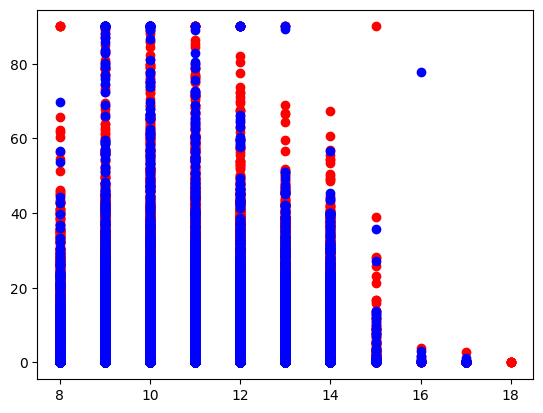

In [34]:
import matplotlib.pyplot as plt

plt.plot(X_train['HORA_DIA'], y_train, "ro")
plt.plot(X_test['HORA_DIA'], y_test, "bo")
plt.show()

#### Regresión lineal en scikit-learn
LinearRegression ajusta un modelo lineal con coeficientes w = (w1, ..., wp) para minimizar la suma residual de cuadrados entre los objetivos observados en el conjunto de datos y los objetivos predichos por la aproximación lineal.

In [35]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

#### Interpretando los coeficientes

In [36]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

11.654674541254849
[-0.53887815 -0.0158382  -0.15128948 -0.15104258  0.07823208]


In [37]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('CATCLI', -0.538878146110411),
 ('TIPO_OPERACION', -0.01583819740244628),
 ('DIA_MES', -0.15128947505203408),
 ('DIA_SEMANA', -0.15104257769087848),
 ('HORA_DIA', 0.07823207530503612)]

In [38]:
# print regression coefficients
pd.DataFrame(zip(X.columns, linreg.coef_))

,0,1
0,CATCLI,-0.538878
1,TIPO_OPERACION,-0.015838
2,DIA_MES,-0.151289
3,DIA_SEMANA,-0.151043
4,HORA_DIA,0.078232


Usando los coeficientes de regresión en la tabla podemos crear la siguiente ecuación de regresión estimada:

> Tiempo de espera (en minutos) = 11.654674 - 0.538878*(CATCLI) - 0.015838*(TIPO_OPERACION) - 0.151289*(DIA_MES) - 0.151043*(DIA_SEMANA) + 0.078232*(HORA_DIA)

#### Haciendo predicciones

In [39]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

## Métricas de desempeño utilizadas

### Métricas de evaluación del modelo para la regresión
Las métricas de evaluación para problemas de clasificación, como **precisión**, no son útiles para problemas de regresión. En cambio, necesitamos métricas de evaluación diseñadas para comparar valores continuos.

Vamos a crear algunas predicciones numéricas de ejemplo y calcular **tres métricas de evaluación comunes** para problemas de regresión:

In [40]:
from sklearn import metrics

# calculate MAE using scikit-learn
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")

# calculate MSE using scikit-learn
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")

# calculate RMSE using scikit-learn
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

MAE: 6.852708199754365
MSE: 109.80090814119663
RMSE: 10.478592851198897


### KFold
El método Kfold devuelve el orden de las muestras elegidas para los conjuntos de entrenamiento y test en cada pliegue. En un marco de datos pandas tenemos que usar la función *.iloc* para obtener las filas correctas.

In [41]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
i = 1

print(f"************************************************************************")
for train_index, test_index in kf.split(X):
    cv_X_train = X.iloc[train_index]
    cv_X_test = X.iloc[test_index]
    cv_y_train = y.iloc[train_index]
    cv_y_test = y.iloc[test_index]
    
    #Train the model
    linreg.fit(cv_X_train, cv_y_train) #Training the model
    cv_y_pred = linreg.predict(cv_X_test)
    print(f"MAE for the fold no. {i} on the test set: {metrics.mean_absolute_error(cv_y_test, cv_y_pred)}")
    # calculate MSE using scikit-learn
    print(f"MSE for the fold no. {i} on the test set: {metrics.mean_squared_error(cv_y_test, cv_y_pred)}")
    # calculate RMSE using scikit-learn
    print(f"RMSE for the fold no. {i} on the test set: {np.sqrt(metrics.mean_squared_error(cv_y_test, cv_y_pred))}")
    print(f"************************************************************************")

    i += 1

************************************************************************
MAE for the fold no. 1 on the test set: 6.703404421519103
MSE for the fold no. 1 on the test set: 99.25325171247334
RMSE for the fold no. 1 on the test set: 9.962592620019818
************************************************************************
MAE for the fold no. 2 on the test set: 6.74118713427571
MSE for the fold no. 2 on the test set: 100.78445550693972
RMSE for the fold no. 2 on the test set: 10.039146154277251
************************************************************************
MAE for the fold no. 3 on the test set: 6.8864148556586855
MSE for the fold no. 3 on the test set: 110.40669571228239
RMSE for the fold no. 3 on the test set: 10.507459051182755
************************************************************************
MAE for the fold no. 4 on the test set: 6.746873284951578
MSE for the fold no. 4 on the test set: 103.460022262863
RMSE for the fold no. 4 on the test set: 10.171529986332587
****

## Descripción de los resultados obtenidos
Luego de realizar una limpieza de datos, y un análisis exhaustivo de los mismos mediante las técnicas de aproximación como ser las funciones de agregación y los diferentes tipos de gráficos, hemos avanzado con el modelo de regresión lineal multivariada para predecir o estimar el tiempo de espera en la cola de una sucursal bancaria, obteniendo un error absoluto medio de aproximadamente 6 minutos en las predicciones.

Respondiendo a las preguntas claves podemos determinar lo siguiente:
- ¿El tiempo de espera está directamente relacionado con el tipo de operación a realizar?

    Observamos cierta tendencia mediante la visualización de que efectivamente existe esta relación, pero no de manera concluyente. Aparentemente hay tipos de operaciones que requieren un mayor tiempo de espera, pero esto debe ser abordado en un estudio más a profundidad por parte de la entidad bancaria. 

- ¿El tiempo de espera está relacionado con la variable del día de la semana? ¿O el horario del día?

    Observamos una relación importante de tiempo de espera en cuanto al día del mes donde vemos que el mayor tiempo se da en los primeros y últimos días.
    En cuanto al día de la semana, la evaluación de los datos obtuvo una cierta tendencia, más nada concluyente dentro del rango de tiempo analizado.
    Y por último, con respecto al horario del día, ciertamente vemos clara tendencia a un mayor tiempo de espera en la cola durante los horarios de la mañana, a diferencia de la tarde en la cual se reduce considerablemente.

- ¿El tiempo de espera está relacionado con la sucursal de atención?

    Observamos una cierta tendencia, más no suficientemente concluyente como para establecer una fuerte relación de dependencia entre la sucursal de atención y el tiempo de espera en la sucursal.

- ¿El tiempo de espera está relacionado con la categoría de cliente?

    Observamos una leve relación entre la categoría del cliente y el tiempo de espera en la sucursal bancaria. Vemos que existen ciertas categorías que tienen un tiempo de espera bastante menor comparado con otros.

Finalmente, podemos concluir que existen tendencias interesantes en cuanto a la predicción del tiempo de espera en cola de una sucursal bancaria en relación a los datos de entrada señalados, pero en general el dataset recibido de las operaciones de un mes no es suficiente para concluir una evolución o tendencia marcada a través del tiempo.
Recomendamos a la entidad profundizar dicho análisis incorporando periodos de tiempo más amplios para continuar evaluando el modelo predictivo.

## Referencias
- [Gomes, Dipta & Nabil, Rashidul & Nur, Kamruddin. (2020). Banking Queue Waiting Time Prediction based on Predicted Service Time using Support Vector Regression. 10.1109/ICCAKM46823.2020.9051490.](https://www.researchgate.net/publication/339228555_Banking_Queue_Waiting_Time_Prediction_based_on_Predicted_Service_Time_using_Support_Vector_Regression)